# Analysis of US Coastguard GPS disruption data

In [1]:
import pandas as pd

In [2]:
GPS_disruption_data=pd.read_csv('gps_disruptions_per_country.csv',parse_dates=['local_date'])

## Introduction

Global Navigation Satellite Systems (GNSS), of which the United States Global Positioning System (GPS) is the most established, are key to a number of applications. As they depend on weak signals coming to terrestrial receivers from satellites in Medium Earth Orbit (MEO), they are also highly vulnerable to interference. GPS disruptions due to a number of reasons, including interference, are reported by users to the United States Coastguard Navigation centre, which publishes the reports on their website. The Blacket review by the United Kingdom's [Government Office for Science (2018)](#Government-Office-for-Science-(2018)) lists different GPS dependencies and vulnerabilities from a UK perspective.  

GPS was originally designed for military use, and despite its numerous civilian applications it is also used for a number of modern military systems, particularly for Unmanned Aerial Vehicles (UAV). Therefore, Electronic warfare (EW) techniques such as jamming and spoofing of GPS signals are often employed in conflict zones as a counter measure against UAVs and other GPS equiped systems. 

[Murrian et al (2021)](#Murrian-MJ,-Narula-L,-Iannucci-PA,-et-al.-(2021)) use data from the FOTON GNSS receiver on board the International Space Station, to detect and geolocate strong GNSS jammers. They find a weak jamming signal from Syria at the end of 2017, which becomes stronger into 2018. By the second half of 2019 another strong jamming signal appears from Libya. The strengthening of jamming in Syria could be part of EW countermeasures following a combined UAV attack against the russian naval base at Tartous and the air base at Hmeimim in January 2018,see story by [Eshel T. (2018)](#Eshel-T.-(2018)). Similarly, the jamming in Libya could be part of countermeasures to UAV attacks in the civil war there, see [Anadolu Agency (2019) news item](#Anadolu-Agency-(31-October-2019)) . 

[Perez Marcos et al (2018)](#Pérez-Marcos,-E.,Konovaltsev,-A.,-Caizzone,-S.,-Cuntz,-M.,-Yinusa,-K.,-Elmarissi,-W.-and-Meurer,-M.-(2018)) use data from a GNSS receiver on board a cargo vessel crossing the Mediterranean, the Red Sea, Persian Gulf and Indian Ocean and on to the far East and back. They detect interference in a number of places along the route, the affected location of relevance here is the Suez canal. This was detected in September 2017, note this is prior to the strengthening of interference from Syria in 2018. 

The far reaching effect of this jamming on civilian aviation in the Mediterranean sea and the wider area has been documented through [maps produced by the Airbus Skywise system for the second half of 2020](#Eurocontrol-Aviation-Intelligence-Unit,-Think-Paper-#9-(2021)), and for the whole of 2021 and included in Eurocontrol reports. [Gerhard Berz (2022)](#Berz-G.-EUROCONTROL-(2022)) of Eurocontrol mentions that the map matches pilot reports and that it has been stable since 2018, which would contradict the second half of 2019 as the date for the emergence of strong interference from Libya. He also provides a different jamming scenario, from a private yacht in the Netherlands equipped with an anti paparazzi drone jammer. 

Theoretically the range of the jammer should be much greater for airborne GNSS receivers compared to GNSS receivers on land or on ships. An analysis of the expected effect of a military jamming exercise at West Freugh published by [Ofcom (2022)](#Ofcom-(2022)) lists a range of up to 7 km, but directional, for GNSS receivers at 2m AMSL, which becomes  up to 50 km in all directions for reveivers at 5,000ft AMSL and up to 90 km at 10,000ft AMSL and above. Such [approved GPS Testing(2022)](#Navigation-Center,-United-States-Coast-Guard-(2022)) by the US military is also published in advance, and it could be one of the sources of interference in US territory along with the use of illegal jammers by civilians. 

## Methods

Data from the U.S. Coastguard Navigation Centre list of disruptions was webscraped, and the location identified by using third party lists of placenames as documented in the README file of this github repository, using Python code within the GPS_data_processing.ipynb jupyter notebook of this repository.

Using [Murrian et al (2021)](#Murrian-MJ,-Narula-L,-Iannucci-PA,-et-al.-(2021)) and [Perez Marcos et al (2018)](#Pérez-Marcos,-E.,Konovaltsev,-A.,-Caizzone,-S.,-Cuntz,-M.,-Yinusa,-K.,-Elmarissi,-W.-and-Meurer,-M.-(2018)) as the main references on jammer locations, and taking the other sources listed in the introduction into account, we group the affected locations based on the suspected jammer location. 

In [3]:
jammmer_effect=pd.concat([pd.DataFrame({'Source':'Syria','destination':'CY'},index=[0]), pd.DataFrame({'Source':'Libya','destination':'MT'},index=[1]),\
pd.DataFrame({'Source':'Libya','destination':'IT'},index=[2]),pd.DataFrame({'Source':'Libya','destination':'LY'},index=[3]),\
                          pd.DataFrame({'Source':'Suez','destination':'EG'},index=[4]),pd.DataFrame({'Source':'US','destination':'US'},index=[5])])



In [4]:
jammmer_effect

,Source,destination
0,Syria,CY
1,Libya,MT
2,Libya,IT
3,Libya,LY
4,Suez,EG
5,US,US


In [5]:
GPS_interference=GPS_disruption_data[GPS_disruption_data['Cause'].str.contains('Interference')]
GPS_interference_assigned=pd.merge(GPS_interference,jammmer_effect,left_on='coalesced_country', right_on='destination')


## Results

In [14]:
GPS_disruption_data.groupby('Cause').count()['Disruption Date/Time']

Cause
GPS Testing                     8
ICD_Violation                   6
IODC_10-Bit                     1
Insufficient Information       62
Mapping Issue                  33
None                            5
Other                           3
Unintentional Interference      5
Unknown Interference          187
User Equipment                109
Name: Disruption Date/Time, dtype: int64

In [15]:
GPS_disruption_data[GPS_disruption_data['Cause']=='GPS Testing']

,Disruption Date/Time,Location,Type,Description,Cause,Closed Date,User,NAVCEN,local_date,coalesced_country
32,05/05/2022 5:38:07 CST,Sandia Crest ALBUQUERQUE,Communications,USER: issue is intermittent affecting the foll...,GPS Testing,05/25/2022,USER: issue is intermittent affecting the foll...,: The GPS Operations Center reviewed the GPS C...,2022-05-05,US
310,09/06/2018 1359 CST,Gulf of Mexico,Marine,User: Multiple vessels in our area experienced...,GPS Testing,05/07/2019,User: Multiple vessels in our area experienced...,: The GPS Operations Center reviewed the GPS C...,2018-09-06,MX
332,05/10/2018 0008 GMT,"Fairbanks, Alaska",Other,"User: Since 10 May, several balloon flights ha...",GPS Testing,05/08/2019,"User: Since 10 May, several balloon flights ha...",: The GPS Operations Center reviewed the GPS C...,2018-05-10,US
364,10/18/2017 0041 UTC,"Addison, TX",Aviation,User: Several pilots have reported a problem w...,GPS Testing,05/20/2019,User: Several pilots have reported a problem w...,: The GPS Operations Center reviewed the GPS C...,2017-10-18,US
379,08/08/2017 0600 PST,"San Clemente Island, CA",Marine,User: For the last two weeks in our area of op...,GPS Testing,05/20/2019,User: For the last two weeks in our area of op...,: The GPS Operations Center reviewed the GPS C...,2017-08-08,US
401,04/02/2017 1007 PST,"Channel Islands, CA",Marine,"User: Several systems, across all of our asset...",GPS Testing,05/20/2019,"User: Several systems, across all of our asset...",: The GPS Operations Center reviewed the GPS C...,2017-04-02,US
410,02/06/2017 0000 CET,"Oberpfaffenhofen, Germany",NaN,User: The reason I am contacting you relates t...,GPS Testing,05/20/2019,User: The reason I am contacting you relates t...,: The GPS Operation Center (GPSOC) stated thes...,2017-02-06,DE
411,01/26/2017 18:00 GMT,United Kingdom,Timing,User: This has been happening over the last 4 ...,GPS Testing,05/20/2019,User: This has been happening over the last 4 ...,: 5 January 2017 the Civil GPS Service Interfa...,2017-01-26,GB


<AxesSubplot: title={'center': 'Locations affected by interference'}, ylabel='coalesced_country'>

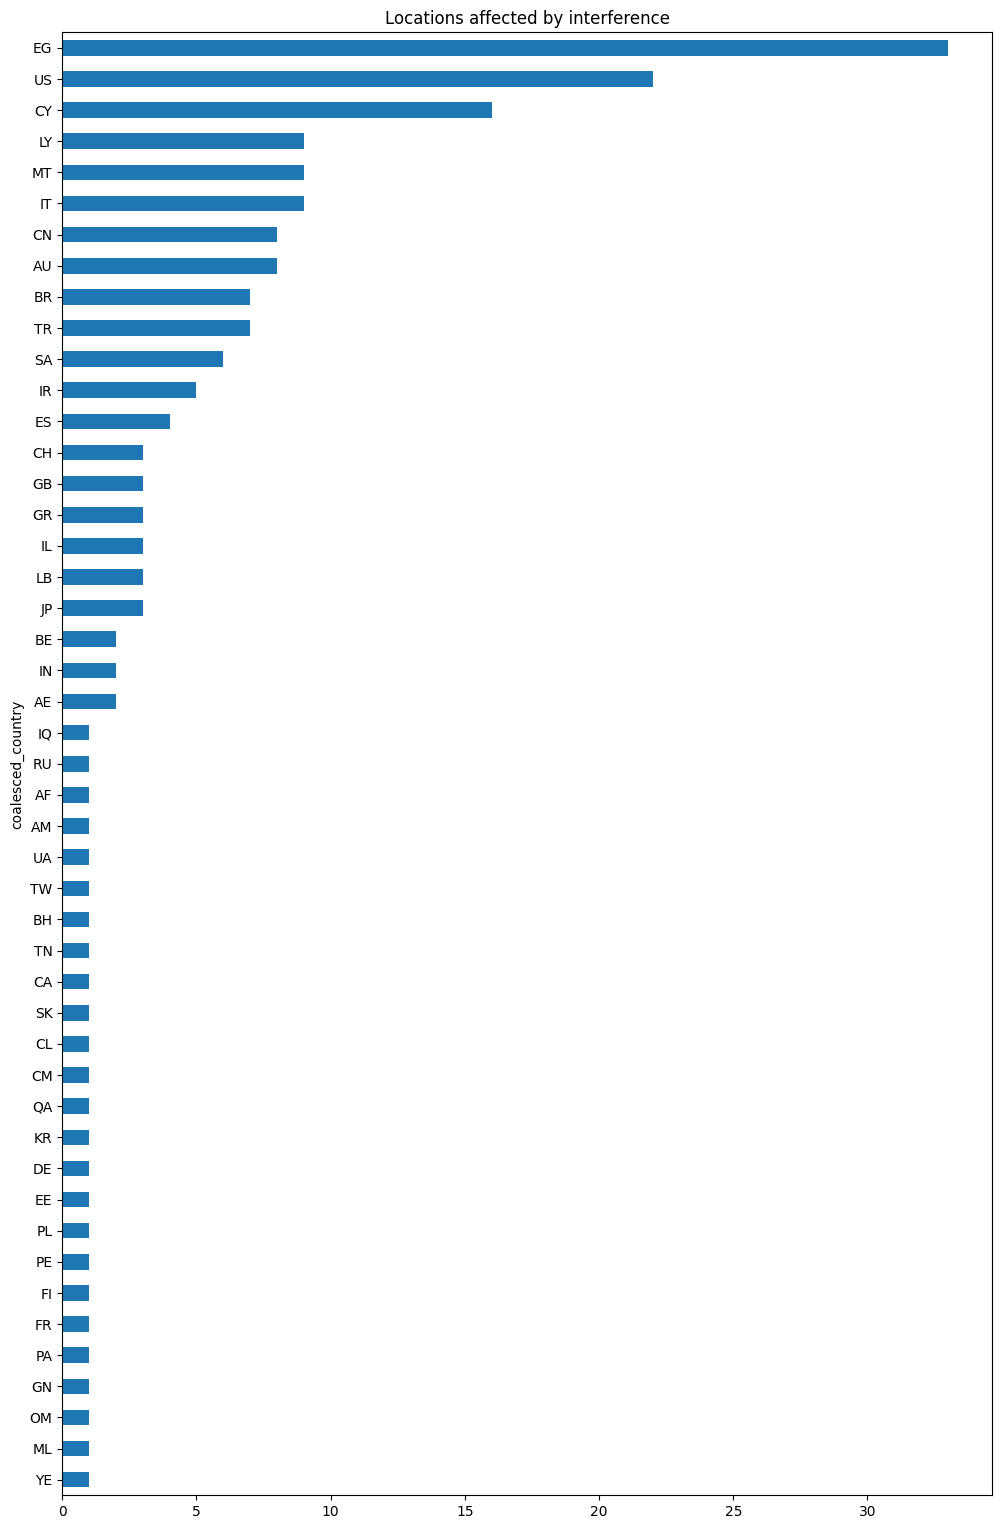

In [6]:
GPS_interference.groupby('coalesced_country').count()['Disruption Date/Time'].sort_values()\
.plot(kind='barh',figsize=[12,19],title='Locations affected by interference')

The majority of the interference cases reported are from Egypt (Suez), United States, and countries withing range of Syria and Libya. 

<AxesSubplot: xlabel='local_date'>

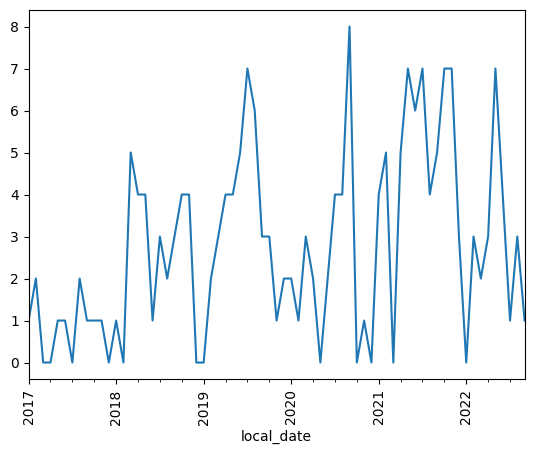

In [16]:
GPS_interference.resample('M', on='local_date').count()['Disruption Date/Time'].plot(rot=90)


<AxesSubplot: xlabel='local_date'>

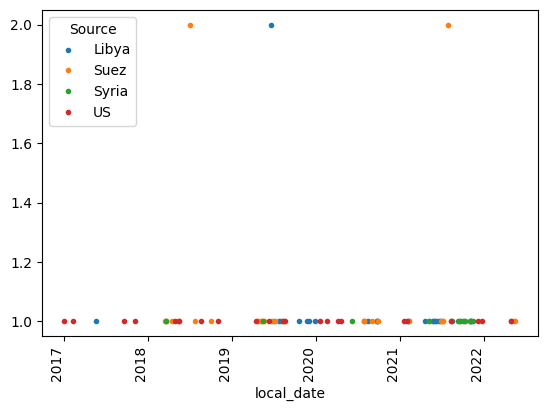

In [17]:
GPS_interference_assigned.groupby(['Source','local_date']).count()['Cause'].unstack().transpose().plot(rot=90,ls='',marker='.')

Syria
Libya
Suez
US


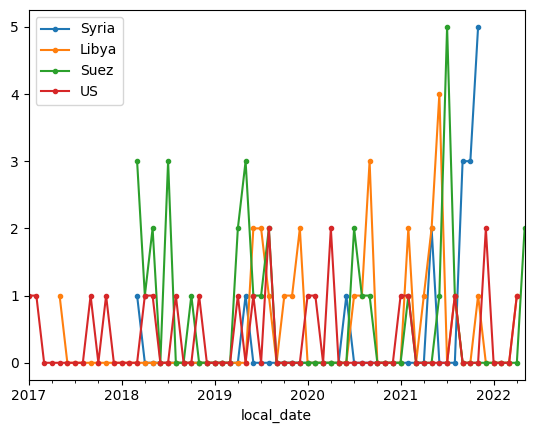

In [18]:
for source_country in jammmer_effect['Source'].unique():
    print(source_country)
    GPS_interference_assigned[GPS_interference_assigned['Source']==source_country].rename(columns={'Disruption Date/Time':source_country})\
    .resample('M', on='local_date').count()[source_country].plot(marker='.').legend()


## Discussion

## Financial support - Conflict of Interest

This work was done in my own personal time, using information in the public domain, my personal computing resources and Github Codespaces, and not funded by my current or previous employers or other parties.

## References

##### Anadolu Agency (31 October 2019) 
[Libya: Haftar forces attack Misrata Air College. College bombed five times by unmanned aerial vehicles, says source with GNA forces.](https://www.aa.com.tr/en/africa/libya-haftar-forces-attack-misrata-air-college/1631348)

##### Berz G. EUROCONTROL (2022) 
[Monitoring GNSS RF Interference, NM User Forum, Monitoring CNS Infrastructure Performance](https://www.eurocontrol.int/sites/default/files/2022-02/eurocontrol-nm-user-forum-gerhard-berz.pdf)
  

##### Eurocontrol Aviation Intelligence Unit, Think Paper #9 (2021) 
[Does Radio Frequency Interference to Satellite Navigation pose an increasing threat to Network efficiency, cost-effectiveness and ultimately safety?](https://www.eurocontrol.int/publication/eurocontrol-think-paper-9-radio-frequency-interference-satellite-navigation-active)

##### Government Office for Science (2018) 
[Satellite-derived Time and Position: A Study of Critical Dependencies](https://www.gov.uk/government/publications/satellite-derived-time-and-position-blackett-review)

##### Murrian MJ, Narula L, Iannucci PA, et al. (2021)
First results from three years of GNSS interference monitoring from low Earth orbit. NAVIGATION. 2021;68:673–685. https://doi.org/10.1002/navi.449

##### Navigation Center, United States Coast Guard (2022)
[Approved GPS Testing](https://navcen.uscg.gov/sites/default/files/pdf/gps/GPS_Interference.pdf)

##### Ofcom (2022) 
[Ofcom Website > Spectrum > Spectrum information > GPS jamming exercises](https://web.archive.org/web/20220121015758/https://www.ofcom.org.uk/spectrum/information/gps-jamming-exercises)

##### Pérez Marcos, E.,Konovaltsev, A., Caizzone, S., Cuntz, M., Yinusa, K., Elmarissi, W. and Meurer, M. (2018) 
[Interference and Spoofing Detection for GNSS Maritime Applications using Direction of Arrival and Conformal Antenna Array](https://elib.dlr.de/127019/1/E2_PerezMarcos_Emilio_final.pdf)

##### Eshel T. (2018)
[Defense update: Russian Forces in Syria Repelled Massive Drone Attack on Hmeimim and Tartus](https://defense-update.com/20180108_uav_attack.html)